In [1]:
### 文本分析 ###
# This notebook does:word segmentation, count word frequency and plot word cloud.
# Programmer: Dan Qin
# Date: 2019.01.30

# load libraries
import pandas as pd
import jieba
import jieba.analyse
import re
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

In [2]:
# load data 
data_txt = open("data/example.txt").read()

In [29]:
# stopwords
stopwords = [line.strip() for line in open("data/哈工大停用词表.txt",encoding="utf-8").readlines()]

# custom stopwords
stp_wrds = ["","\n\n"]
for wrd in stp_wrds:
    stopwords.append(wrd)

In [3]:
# # custom word library(if required)
# word_lib = [""]

# for word in word_lib:
#     jieba.add_word(word)

In [5]:
# -- Define functions -- 
def CutWords(txt, stopwords):
    '''Return a list of cut words excluding stopwords
    :params: txt - str of txt for cutting
    :params: stopwords - list of stopwords
    :return: a list of tokens'''
    
    result = []
    
    words = jieba.cut(txt, cut_all = True)
    for word in words:
        if word not in stopwords:
            result.append(word)
    
    return result

In [6]:
def WordFreq(words, n):
    '''Print the frequency of words.
    :params: words - a list of tokens
    :params: n - number of top words for printing'''
    
    # count the frequency of words
    counts = {}
    for word in words:
        if len(word) != 1:
            counts[word] = counts.get(word,0) + 1
        else:
            continue
            
    # sort the items by word frequency
    items = list(counts.items())
    items.sort(key = lambda x:x[1], reverse = True)

    # print top n words by frequency(desc)
    for i in range(n):
        word, count = items[i]
        print("{:<5}{:>5}".format(word, count))

In [7]:
def GenWordCloud(words):
    '''Return wordcloud of txt string.
    :params: words - a list of tokens
    :return: wordcloud img'''

    # join the cut words into a single string for wordcloud
    wordstring = " ".join(words)
    
    # color by word frequency not available by wordcloud
    wordcloud = WordCloud(
        font_path = "simhei.ttf",
        background_color="white",
        width = 900,
        height = 600,
        collocations=False,
        random_state = 200).generate(wordstring)
    
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")

In [8]:
def SenWthWord(keyword, txt):
    '''Return a string of sentences containing the keyword.
    :params: keyword - keyword for matching sentences
    :params: txt - str of txt for cutting'''
    
    results = re.findall(r'[^。]*?{}[^。]*?。'.format(keyword), txt)  
    return "".join(results)

## Outputs

In [30]:
# -- Word Frequency --

# OPTION I: if data source is a table
# str_csv = data_csv['text'].dropna().to_string()

# OPTION II: if data source is a txt file
words_txt = CutWords(data_txt, stopwords)
WordFreq(words_txt, 10)

父亲      11
看见       7
背影       4
茶房       4
终于       4
铁道       4
桔子       4
不能       3
北京       3
丧事       3


In [10]:
# # keywords extracting using tf-idf algorithm
# jieba.analyse.extract_tags(txt_gov, topK = 30)

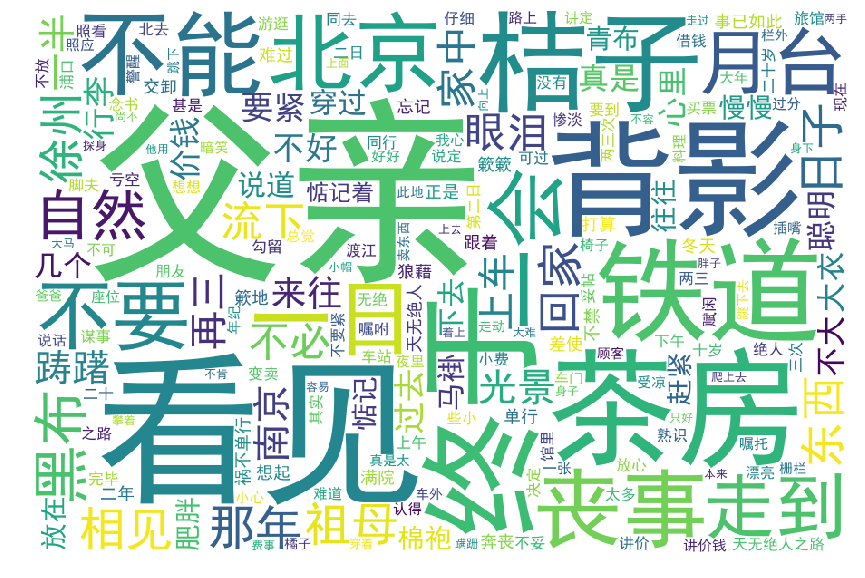

In [14]:
# -- Wordcloud --
GenWordCloud(words_txt)

In [31]:
# -- 关键词所在句子分析 -- 
keywords = ["父亲","看见","背影"]

# freq of words
for kw in keywords:
    # extract sentences with keywords from two reports
    kw_str = SenWthWord(kw, data_txt)
    words_cut = CutWords(kw_str, stopwords)
    
    print("关键词：" + kw)
    print("-" * 30)
    WordFreq(words_cut, 5)
    print("")    

关键词：父亲
------------------------------
父亲      11
丧事       3
祖母       2
日子       2
北京       2

关键词：看见
------------------------------
看见       7
黑布       3
流下       2
马褂       2
青布       2

关键词：背影
------------------------------
背影       4
肥胖       2
看见       2
父亲       1
相见       1



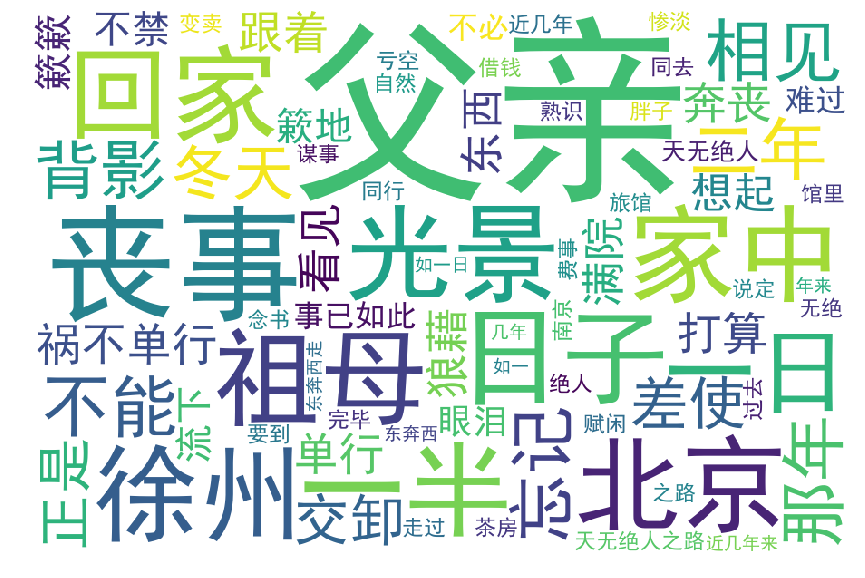

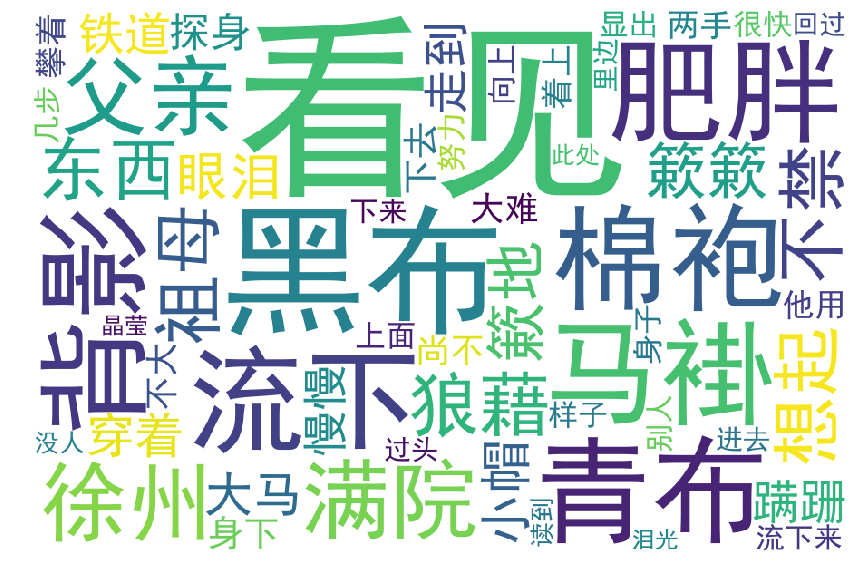

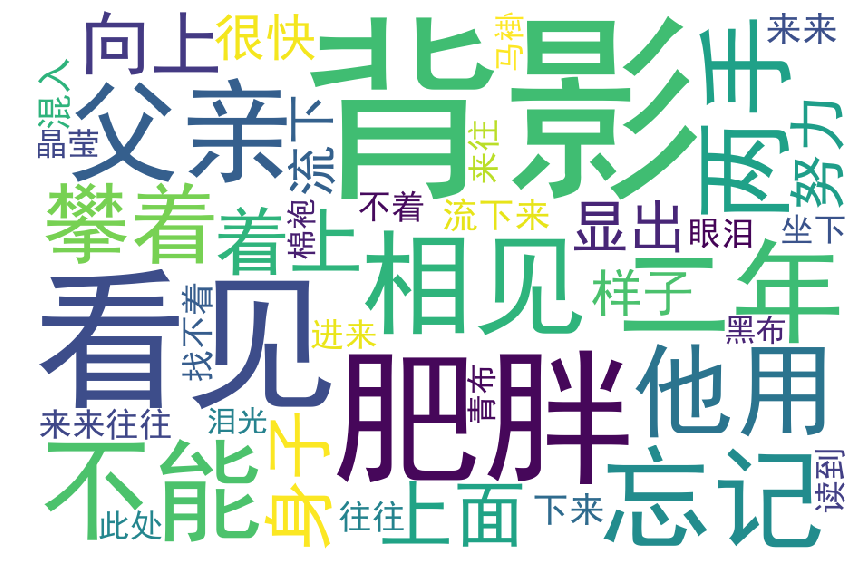

In [32]:
# wordcloud for sentences containing keywords
for kw in keywords:
    # extract sentences with keywords from two reports
    kw_str = SenWthWord(kw, data_txt) 
    words_cut = CutWords(kw_str, stopwords)
    
    GenWordCloud(words_cut)